In [2]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv("C:/Users/kanak/Downloads/Day8 Coding Challenge/Day8 Coding Challenge/manufacturing_dataset.csv")

In [4]:
df

,Date,Plant_ID,Product_ID,Product_Category,Units_Produced,Units_Defective,Machine_Downtime(hrs),Labor_Hours,Material_Cost(INR),Production_Cost(INR),Revenue(INR)
0,2024-01-02,PLANT_B,P013,Automotive,1939,37,1.63,272,73816,377954,468407
1,2024-01-02,PLANT_C,P007,Textile,804,131,0.35,187,51306,145619,227221
2,2024-01-02,PLANT_B,P009,Textile,926,125,0.37,194,69477,211585,361157
3,2024-01-04,PLANT_A,P013,Chemicals,1885,143,1.11,267,160317,365406,448059
4,2024-01-05,PLANT_A,P014,Textile,1760,96,1.70,53,194228,379518,476295
...,...,...,...,...,...,...,...,...,...,...,...
495,2025-05-07,PLANT_B,P001,Chemicals,1879,53,3.42,244,183943,151717,172024
496,2025-05-11,PLANT_B,P008,Electronics,1572,63,5.78,108,55668,294472,389780
497,2025-05-11,PLANT_B,P001,Automotive,989,93,4.10,60,117391,275458,305835
498,2025-05-13,PLANT_C,P018,Chemicals,944,24,6.57,207,143330,345762,445628


In [7]:

inconsistent_products = df.groupby('Product_ID')['Product_Category'].nunique()

inconsistent_products = inconsistent_products[inconsistent_products > 1]

print("Inconsistent ProductIDs with multiple categories:")
print(inconsistent_products)


Inconsistent ProductIDs with multiple categories:
Product_ID
P001    4
P002    4
P003    4
P004    4
P005    4
P006    4
P007    4
P008    4
P009    4
P010    4
P011    4
P012    4
P013    4
P014    4
P015    4
P016    4
P017    4
P018    4
P019    4
P020    4
Name: Product_Category, dtype: int64


In [10]:
df1=df.copy()
df1

,Date,Plant_ID,Product_ID,Product_Category,Units_Produced,Units_Defective,Machine_Downtime(hrs),Labor_Hours,Material_Cost(INR),Production_Cost(INR),Revenue(INR)
0,2024-01-02,PLANT_B,P013,Automotive,1939,37,1.63,272,73816,377954,468407
1,2024-01-02,PLANT_C,P007,Textile,804,131,0.35,187,51306,145619,227221
2,2024-01-02,PLANT_B,P009,Textile,926,125,0.37,194,69477,211585,361157
3,2024-01-04,PLANT_A,P013,Chemicals,1885,143,1.11,267,160317,365406,448059
4,2024-01-05,PLANT_A,P014,Textile,1760,96,1.70,53,194228,379518,476295
...,...,...,...,...,...,...,...,...,...,...,...
495,2025-05-07,PLANT_B,P001,Chemicals,1879,53,3.42,244,183943,151717,172024
496,2025-05-11,PLANT_B,P008,Electronics,1572,63,5.78,108,55668,294472,389780
497,2025-05-11,PLANT_B,P001,Automotive,989,93,4.10,60,117391,275458,305835
498,2025-05-13,PLANT_C,P018,Chemicals,944,24,6.57,207,143330,345762,445628


In [11]:

most_frequent_category = df1.groupby('Product_ID')['Product_Category'] \
                           .agg(lambda x: x.value_counts().idxmax()) \
                           .reset_index()

# Merge back to get a clean dataframe
df_clean = df1[['Product_ID']].drop_duplicates().merge(most_frequent_category, on='Product_ID')

print("Cleaned Data:")
print(df_clean)
df_clean.info()

Cleaned Data:
   Product_ID Product_Category
0        P013       Automotive
1        P007          Textile
2        P009          Textile
3        P014          Textile
4        P019      Electronics
5        P005      Electronics
6        P006       Automotive
7        P010          Textile
8        P012       Automotive
9        P017      Electronics
10       P003       Automotive
11       P011        Chemicals
12       P004      Electronics
13       P001      Electronics
14       P020      Electronics
15       P008       Automotive
16       P015          Textile
17       P018          Textile
18       P016        Chemicals
19       P002          Textile
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Product_ID        20 non-null     object
 1   Product_Category  20 non-null     object
dtypes: object(2)
memory usage: 452.0+ bytes


In [13]:
inconsistent_products = df.groupby('Product_ID')['Product_Category'].nunique()
inconsistent_products

Product_ID
P001    4
P002    4
P003    4
P004    4
P005    4
P006    4
P007    4
P008    4
P009    4
P010    4
P011    4
P012    4
P013    4
P014    4
P015    4
P016    4
P017    4
P018    4
P019    4
P020    4
Name: Product_Category, dtype: int64

In [16]:


# Find the most frequent category per Product_ID
most_freq_category = df1.groupby('Product_ID')['Product_Category'].agg(lambda x: x.mode()[0])

# Replace original column values with most frequent category
df1['Product_Category'] = df1['Product_ID'].map(most_freq_category)

# Result
print(df1)


           Date Plant_ID Product_ID Product_Category  Units_Produced  \
0    2024-01-02  PLANT_B       P013       Automotive            1939   
1    2024-01-02  PLANT_C       P007          Textile             804   
2    2024-01-02  PLANT_B       P009          Textile             926   
3    2024-01-04  PLANT_A       P013       Automotive            1885   
4    2024-01-05  PLANT_A       P014        Chemicals            1760   
..          ...      ...        ...              ...             ...   
495  2025-05-07  PLANT_B       P001      Electronics            1879   
496  2025-05-11  PLANT_B       P008       Automotive            1572   
497  2025-05-11  PLANT_B       P001      Electronics             989   
498  2025-05-13  PLANT_C       P018        Chemicals             944   
499  2025-05-14  PLANT_A       P002          Textile            1104   

     Units_Defective  Machine_Downtime(hrs)  Labor_Hours  Material_Cost(INR)  \
0                 37                   1.63          27

In [17]:
pd.DataFrame(df1)

,Date,Plant_ID,Product_ID,Product_Category,Units_Produced,Units_Defective,Machine_Downtime(hrs),Labor_Hours,Material_Cost(INR),Production_Cost(INR),Revenue(INR)
0,2024-01-02,PLANT_B,P013,Automotive,1939,37,1.63,272,73816,377954,468407
1,2024-01-02,PLANT_C,P007,Textile,804,131,0.35,187,51306,145619,227221
2,2024-01-02,PLANT_B,P009,Textile,926,125,0.37,194,69477,211585,361157
3,2024-01-04,PLANT_A,P013,Automotive,1885,143,1.11,267,160317,365406,448059
4,2024-01-05,PLANT_A,P014,Chemicals,1760,96,1.70,53,194228,379518,476295
...,...,...,...,...,...,...,...,...,...,...,...
495,2025-05-07,PLANT_B,P001,Electronics,1879,53,3.42,244,183943,151717,172024
496,2025-05-11,PLANT_B,P008,Automotive,1572,63,5.78,108,55668,294472,389780
497,2025-05-11,PLANT_B,P001,Electronics,989,93,4.10,60,117391,275458,305835
498,2025-05-13,PLANT_C,P018,Chemicals,944,24,6.57,207,143330,345762,445628


In [18]:
df1.to_csv("cleaned manufacturing dataset")

In [21]:
df1.dtypes

Date                      object
Plant_ID                  object
Product_ID                object
Product_Category          object
Units_Produced             int64
Units_Defective            int64
Machine_Downtime(hrs)    float64
Labor_Hours                int64
Material_Cost(INR)         int64
Production_Cost(INR)       int64
Revenue(INR)               int64
dtype: object

In [22]:


# Convert date column
df1['Date'] = pd.to_datetime(df1['Date'])

# Convert categorical columns
df1['Product_Category'] = df1['Product_Category'].astype('category')

# Convert costs and revenue to float
df1['Material_Cost(INR)'] = df1['Material_Cost(INR)'].astype(float)
df1['Production_Cost(INR)'] = df1['Production_Cost(INR)'].astype(float)
df1['Revenue(INR)'] = df1['Revenue(INR)'].astype(float)

# Check updated dtypes
df1.dtypes


Date                     datetime64[ns]
Plant_ID                         object
Product_ID                       object
Product_Category               category
Units_Produced                    int64
Units_Defective                   int64
Machine_Downtime(hrs)           float64
Labor_Hours                       int64
Material_Cost(INR)              float64
Production_Cost(INR)            float64
Revenue(INR)                    float64
dtype: object

In [24]:
df1.drop_duplicates(inplace=True)
df1

,Date,Plant_ID,Product_ID,Product_Category,Units_Produced,Units_Defective,Machine_Downtime(hrs),Labor_Hours,Material_Cost(INR),Production_Cost(INR),Revenue(INR)
0,2024-01-02,PLANT_B,P013,Automotive,1939,37,1.63,272,73816.0,377954.0,468407.0
1,2024-01-02,PLANT_C,P007,Textile,804,131,0.35,187,51306.0,145619.0,227221.0
2,2024-01-02,PLANT_B,P009,Textile,926,125,0.37,194,69477.0,211585.0,361157.0
3,2024-01-04,PLANT_A,P013,Automotive,1885,143,1.11,267,160317.0,365406.0,448059.0
4,2024-01-05,PLANT_A,P014,Chemicals,1760,96,1.70,53,194228.0,379518.0,476295.0
...,...,...,...,...,...,...,...,...,...,...,...
495,2025-05-07,PLANT_B,P001,Electronics,1879,53,3.42,244,183943.0,151717.0,172024.0
496,2025-05-11,PLANT_B,P008,Automotive,1572,63,5.78,108,55668.0,294472.0,389780.0
497,2025-05-11,PLANT_B,P001,Electronics,989,93,4.10,60,117391.0,275458.0,305835.0
498,2025-05-13,PLANT_C,P018,Chemicals,944,24,6.57,207,143330.0,345762.0,445628.0


### new columns


In [29]:
# Defect Rate (%) = (Defective Units / Total Units Produced) * 100
df1['Defect_Rate'] = (df1['Units_Defective'] / df1['Units_Produced']) * 100

# Profit = Revenue - Cost
df1['Profit'] = df1['Revenue(INR)'] - df1['Production_Cost(INR)']
df1.head(5)

,Date,Plant_ID,Product_ID,Product_Category,Units_Produced,Units_Defective,Machine_Downtime(hrs),Labor_Hours,Material_Cost(INR),Production_Cost(INR),Revenue(INR),Defect_Rate,Profit
0,2024-01-02,PLANT_B,P013,Automotive,1939,37,1.63,272,73816.0,377954.0,468407.0,1.908200,90453.0
1,2024-01-02,PLANT_C,P007,Textile,804,131,0.35,187,51306.0,145619.0,227221.0,16.293532,81602.0
2,2024-01-02,PLANT_B,P009,Textile,926,125,0.37,194,69477.0,211585.0,361157.0,13.498920,149572.0
3,2024-01-04,PLANT_A,P013,Automotive,1885,143,1.11,267,160317.0,365406.0,448059.0,7.586207,82653.0
4,2024-01-05,PLANT_A,P014,Chemicals,1760,96,1.70,53,194228.0,379518.0,476295.0,5.454545,96777.0


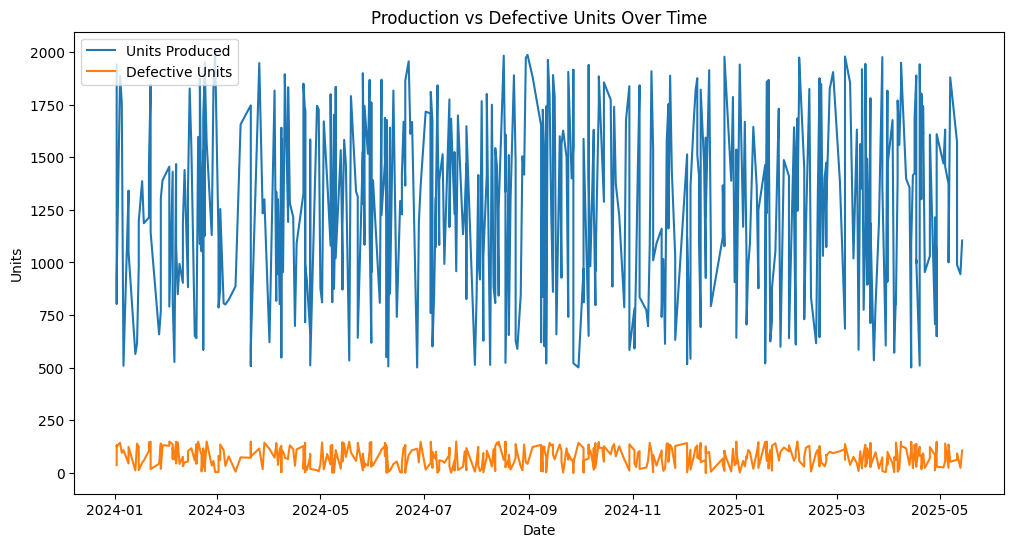

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(df1['Date'], df1['Units_Produced'], label='Units Produced')
plt.plot(df1['Date'], df1['Units_Defective'], label='Defective Units')
plt.xlabel('Date')
plt.ylabel('Units')
plt.title('Production vs Defective Units Over Time')
plt.legend()
plt.show()


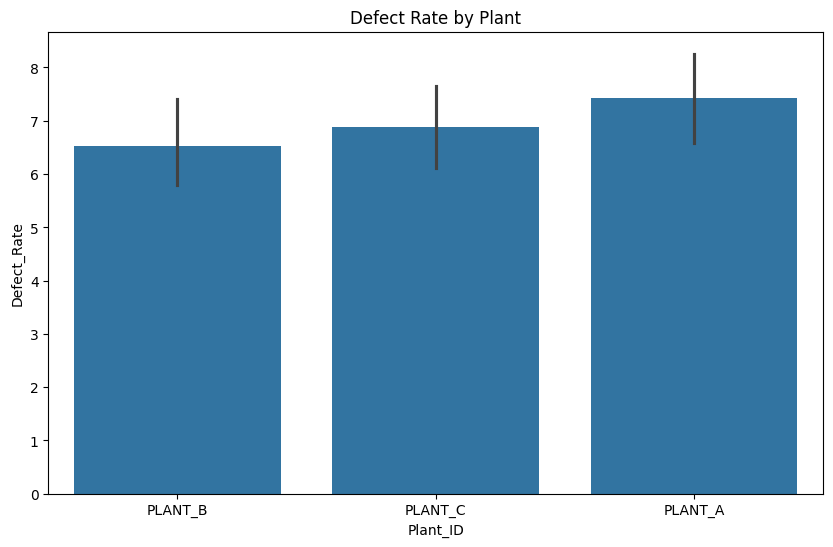

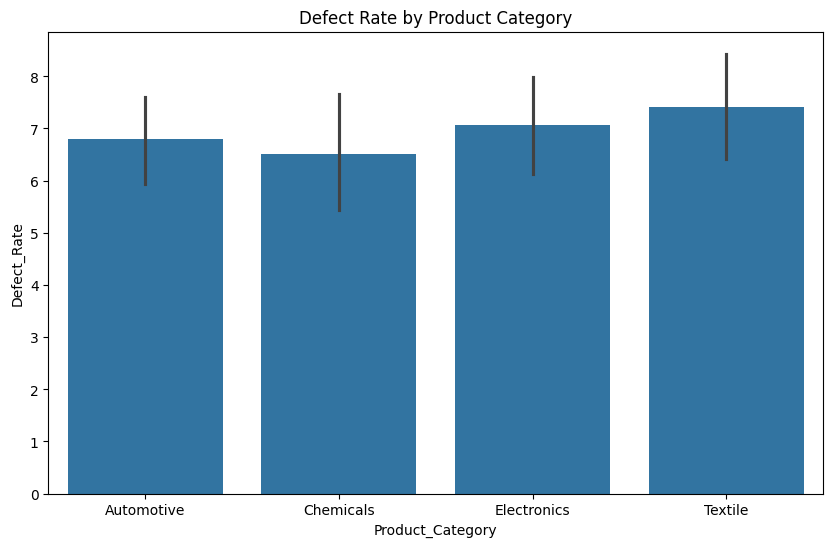

In [36]:
import seaborn as sns



plt.figure(figsize=(10,6))
sns.barplot(data=df1, x='Plant_ID', y='Defect_Rate')
plt.title('Defect Rate by Plant')
plt.show()

plt.figure(figsize=(10,6))
sns.barplot(data=df1, x='Product_Category', y='Defect_Rate')
plt.title('Defect Rate by Product Category')
plt.show()


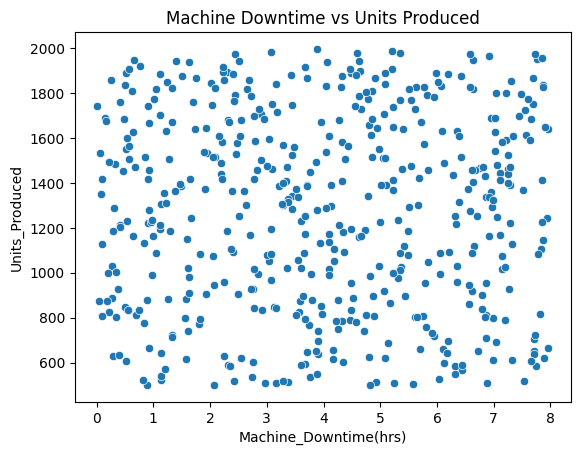

,Machine_Downtime(hrs),Units_Produced
Machine_Downtime(hrs),1.000000,-0.002397
Units_Produced,-0.002397,1.000000


In [43]:
sns.scatterplot(data=df, x='Machine_Downtime(hrs)', y='Units_Produced')
plt.title('Machine Downtime vs Units Produced')
plt.show()

# Correlation
df1[['Machine_Downtime(hrs)','Units_Produced']].corr()


In [44]:
top_products = df1.groupby('Product_Category')['Profit'].sum().sort_values(ascending=False).head(5)
top_products


C:\Users\kanak\AppData\Local\Temp\ipykernel_19920\2139101795.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_products = df1.groupby('Product_Category')['Profit'].sum().sort_values(ascending=False).head(5)


Product_Category
Automotive     13414200.0
Electronics    11822008.0
Textile         9970150.0
Chemicals       7264725.0
Name: Profit, dtype: float64

C:\Users\kanak\AppData\Local\Temp\ipykernel_19920\3130593944.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  profit_category = df1.groupby('Product_Category')['Profit'].sum().reset_index()


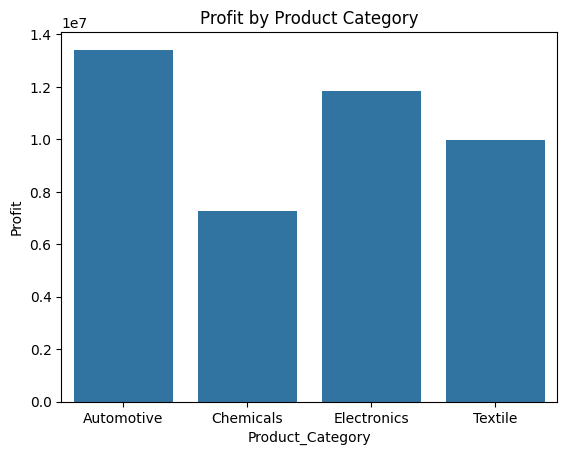

In [45]:
profit_category = df1.groupby('Product_Category')['Profit'].sum().reset_index()
sns.barplot(data=profit_category, x='Product_Category', y='Profit')
plt.title('Profit by Product Category')
plt.show()


In [49]:
# Check which rows in Material_Cost are non-numeric
df1[~df1['Material_Cost(INR)'].apply(lambda x: str(x).replace('.', '', 1).isdigit())]


,Date,Plant_ID,Product_ID,Product_Category,Units_Produced,Units_Defective,Machine_Downtime(hrs),Labor_Hours,Material_Cost(INR),Production_Cost(INR),Revenue(INR),Defect_Rate,Profit


In [50]:
# Convert numeric columns 
numeric_cols = ['Material_Cost(INR)', 'Production_Cost(INR)', 'Revenue(INR)']

for col in numeric_cols:
    df1[col] = pd.to_numeric(df[col], errors='coerce')  # non-numeric become NaN


In [51]:
# Fill NaNs with 0 or median, depending on your choice
df1[numeric_cols] = df[numeric_cols].fillna(0)


In [55]:
# 1. Convert date
df1['Date'] = pd.to_datetime(df1['Date'], errors='coerce')

# 2. Numeric columns
numeric_cols = ['Units_Produced', 'Units_Defective', 'Machine_Downtime(hrs)',
                'Labor_Hours', 'Material_Cost(INR)', 'Production_Cost(INR)', 'Revenue(INR)']

for col in numeric_cols:
    df1[col] = pd.to_numeric(df1[col], errors='coerce')

# 3. Categorical columns
cat_cols = ['Plant_ID', 'Product_ID', 'Product_Category']
for col in cat_cols:
    df1[col] = df1[col].astype(str)


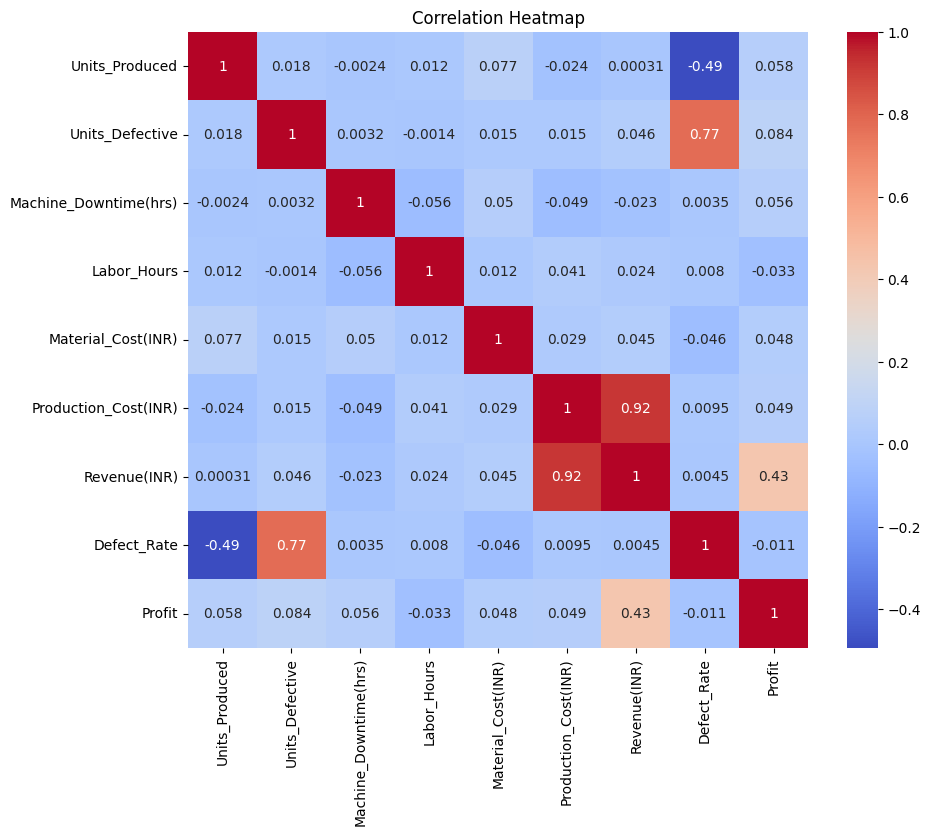

In [58]:
# Select only numeric columns
numeric_df = df1.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
